### 05.K-Means

In [1]:
import os # 경고 대응
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 뜰때 무시하고 처리

In [3]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [5]:
x = dataset.iloc[:,:].values # x=datase.values, x = dataset.to_numpy() # 공식 홈피
x[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화(전체 데이터 분포 확인)

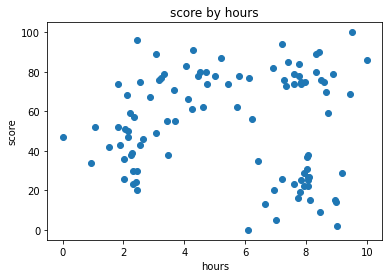

In [6]:
plt.scatter(x[:,0], x[:,1]) # x축 : hour, y축 : score
             #값 : hour, 값 : score
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(축 범위 동일)

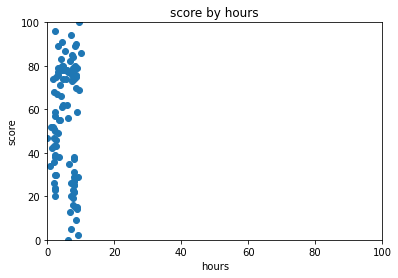

In [7]:
plt.scatter(x[:,0], x[:,1]) # x축 : hour, y축 : score
             #값 : hour, 값 : score
plt.title('score by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.ylim(0,100)
plt.show()
# x,y범위가 다를 경우 범위를 맞춰주어야 정확한 값을 얻음

### 피처 스케일링(Feature Scaling)

In [8]:
from sklearn.preprocessing import StandardScaler # 스케일링 도구
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화(스케일링된 데이터)

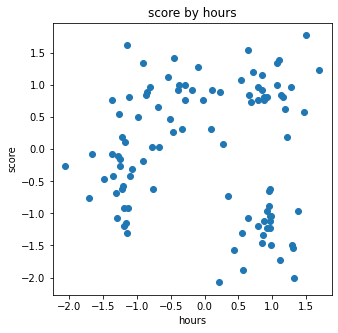

In [9]:
plt.figure(figsize=(5,5)) # 그래프 크기 조절
plt.scatter(x[:,0], x[:,1]) # x축 : hour, y축 : score
             #값 : hour, 값 : score
plt.title('score by hours')
plt.xlabel('hours')

plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기(엘보우 방식 Elbow Method)

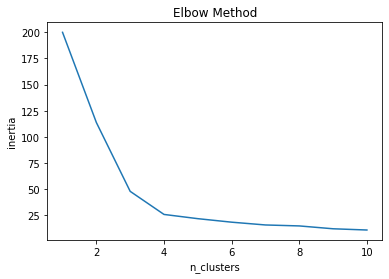

In [10]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):# 공부 시간이 1~10시간
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4)값으로 KMeans 학습

In [11]:
K = 4 # 최적의 K 값

In [13]:
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(x)
y_kmeans=kmeans.fit_predict(x) # x데이터를 넣고 학습을 하고 이를 통해서 예측되는 값을 반환
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화(최적의K)

In [15]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

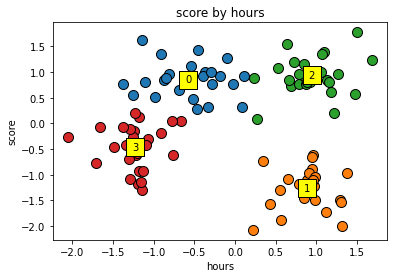

In [17]:
for cluster in range(K):
    plt.scatter(x[y_kmeans == cluster, 0], x[y_kmeans == cluster, 1], s=100, edgecolor='black') # x데이터 중에서 cluster가 0인 값만 가져오기
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 옐로우 네모
                    # for 반복문에서 0~3까지 (`-0.5,0.8,0.9,-1.2) : x좌표
                    # for 반복문에서 0~3까지 (0.8,-1.2,0.8,-0.4) : y좌표
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center',ha='center') # 클러스터 텍스트 출력
plt.title('score by hours')
plt.xlabel('hours')

plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [20]:
x_org = sc.inverse_transform(x) # Feature Scaling 된 데이터를 다시 원복
x_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [23]:
centers_org = sc.inverse_transform(centers)# Feature Scaling 된 데이터를 다시 원복
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

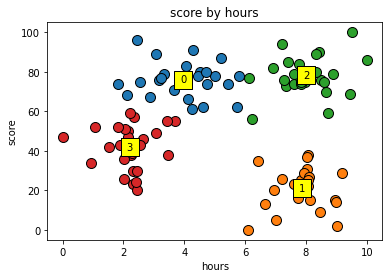

In [24]:
for cluster in range(K):
    plt.scatter(x_org[y_kmeans == cluster, 0], x_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # x데이터 중에서 cluster가 0인 값만 가져오기
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 옐로우 네모
                    # for 반복문에서 0~3까지 (`-0.5,0.8,0.9,-1.2) : x좌표
                    # for 반복문에서 0~3까지 (0.8,-1.2,0.8,-0.4) : y좌표
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center',ha='center') # 클러스터 텍스트 출력
plt.title('score by hours')
plt.xlabel('hours')

plt.ylabel('score')
plt.show()